# **Fundamentos de Inteligencia Artificial**

### Juan Dario Rodas - jdrodas@hotmail.com
### Enero 12 de 2026


# **Fundamentos de Matplotlib**

## Introducción

**Matplotlib** es la librería de visualización más utilizada en Python y una herramienta fundamental para cualquier proyecto de Inteligencia Artificial. En este notebook aprenderemos los conceptos esenciales para crear visualizaciones efectivas de nuestros datos y resultados.

### ¿Por qué Matplotlib es importante en IA?

En los notebooks anteriores trabajamos con **Pandas** para manipular datos y **NumPy** para operaciones numéricas. Ahora necesitamos **visualizar**:

- **Datos de entrenamiento**: entender la distribución y características de nuestros datasets
- **Métricas de desempeño**: monitorear cómo aprende nuestro modelo (loss, accuracy, etc.)
- **Resultados**: visualizar predicciones, matrices de confusión, fronteras de decisión
- **Arquitecturas**: representar pesos, activaciones y características aprendidas



In [ ]:
# Imports esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración para mejorar la visualización en Jupyter
%matplotlib inline

# Configuración de estilo y calidad de gráficos
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño por defecto de las figuras
plt.rcParams['figure.dpi'] = 100           # Resolución de las figuras
plt.rcParams['font.size'] = 11             # Tamaño de fuente por defecto

# Opcional: usar un estilo más moderno
plt.style.use('seaborn-v0_8-darkgrid')     # Estilo con grilla

print("Resultado de la importación:")
print(f"Versión de Matplotlib: {plt.matplotlib.__version__}")
print(f"Versión de NumPy: {np.__version__}")
print(f"Versión de Pandas: {pd.__version__}")

Resultado de la importación:
Versión de Matplotlib: 3.10.0
Versión de NumPy: 2.0.2
Versión de Pandas: 2.2.2


## **1. Anatomía de una Figura en Matplotlib**

Antes de crear gráficos complejos, es fundamental entender la estructura básica de Matplotlib.

### Componentes principales
```
┌─────────────────────────────────────┐
│         Figure (Figura)             │  ← Contenedor principal
│  ┌───────────────────────────────┐  │
│  │      Axes (Ejes)              │  │  ← Área de graficación
│  │                               │  │
│  │    ┌─────────────────┐        │  │
│  │    │   Plot Area     │        │  │  ← Donde se dibujan los datos
│  │    │                 │        │  │
│  │    └─────────────────┘        │  │
│  │    xlabel        ylabel       │  │  ← Etiquetas
│  │                               │  │
│  └───────────────────────────────┘  │
│              title                  │  ← Título
└─────────────────────────────────────┘
```

### Conceptos clave

- **Figure**: El lienzo completo donde se dibuja todo
- **Axes**: El sistema de coordenadas donde viven los datos (puede haber múltiples en una Figure)
- **Axis**: Los ejes X e Y individuales
- **Artist**: Cualquier elemento visual (líneas, texto, etc.)

### Dos formas de trabajar con Matplotlib

1. **pyplot (estilo MATLAB)**: Simple y rápido para gráficos básicos
2. **Orientado a objetos**: Más control y recomendado para gráficos complejos

En este notebook usaremos principalmente el **enfoque orientado a objetos** porque es más explícito y escalable para proyectos de IA.


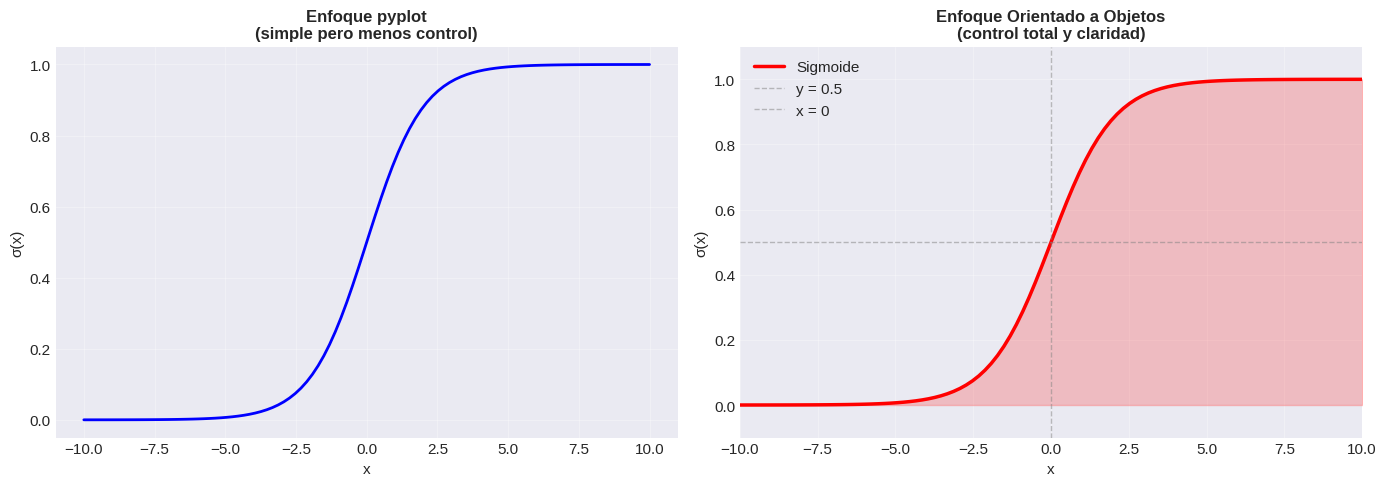


Ventajas del enfoque orientado a objetos:
  Control explícito sobre cada subplot (ax1, ax2)
  Fácil personalización individual de cada gráfico
  Código más legible y mantenible
  Ideal para figuras complejas con múltiples ejes


In [ ]:
# Datos de ejemplo: una función sigmoide (función de activación común en IA)
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))  # Función sigmoide

# ==========================================
# Comparación lado a lado en una sola figura
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ENFOQUE 1: pyplot (estilo MATLAB) - simulado en ax1
ax1.plot(x, y, 'b-', linewidth=2)
ax1.set_title('Enfoque pyplot\n(simple pero menos control)', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('σ(x)')
ax1.grid(True, alpha=0.3)

# ENFOQUE 2: Orientado a Objetos (recomendado) - con personalización avanzada
ax2.plot(x, y, 'r-', linewidth=2.5, label='Sigmoide')
ax2.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='y = 0.5')
ax2.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='x = 0')
ax2.fill_between(x, 0, y, alpha=0.2, color='red')
ax2.set_title('Enfoque Orientado a Objetos\n(control total y claridad)', fontsize=12, fontweight='bold')
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('σ(x)', fontsize=11)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlim(-10, 10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVentajas del enfoque orientado a objetos:")
print("  Control explícito sobre cada subplot (ax1, ax2)")
print("  Fácil personalización individual de cada gráfico")
print("  Código más legible y mantenible")
print("  Ideal para figuras complejas con múltiples ejes")

## **2. Un primer Gráfico Simple**

Ahora que entendemos la estructura, creemos nuestro primer gráfico paso a paso usando el enfoque orientado a objetos.

Graficaremos una **función de pérdida típica** durante el entrenamiento de un modelo de IA.




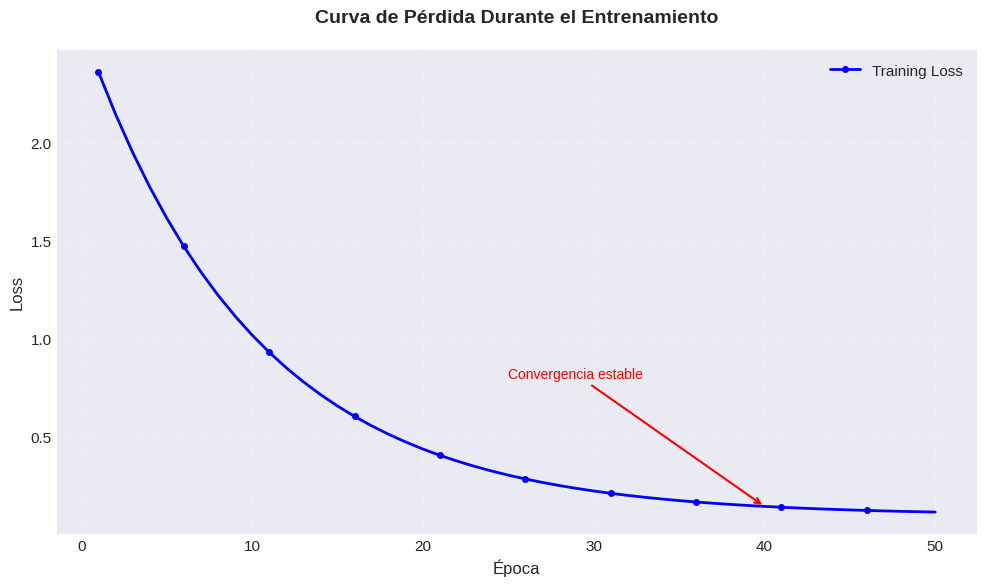

Gráfico básico creado exitosamente
  Pérdida inicial: 2.362
  Pérdida final: 0.117


In [ ]:
# Simulamos el comportamiento de la pérdida (loss) durante el entrenamiento
epochs = np.arange(1, 51)  # 50 épocas
loss = 2.5 * np.exp(-0.1 * epochs) + 0.1  # Pérdida que decrece exponencialmente

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos
ax.plot(epochs, loss, 'b-', linewidth=2, marker='o', markersize=4,
        markevery=5, label='Training Loss')

# Personalizar el gráfico
ax.set_title('Curva de Pérdida Durante el Entrenamiento', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Época', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

# Añadir una anotación para destacar un punto importante
ax.annotate('Convergencia estable',
            xy=(40, loss[39]),
            xytext=(25, 0.8),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10,
            color='red')

plt.tight_layout()
plt.show()

print("Gráfico básico creado exitosamente")
print(f"  Pérdida inicial: {loss[0]:.3f}")
print(f"  Pérdida final: {loss[-1]:.3f}")



## **3. Gráficos Fundamentales para IA**

En esta sección exploraremos los tipos de gráficos más utilizados en proyectos de Inteligencia Artificial.

### **3.1 Gráficos de Líneas: Funciones de Activación**

Las funciones de activación son componentes esenciales de las redes neuronales. Visualizarlas nos ayuda a entender cómo transforman las señales.



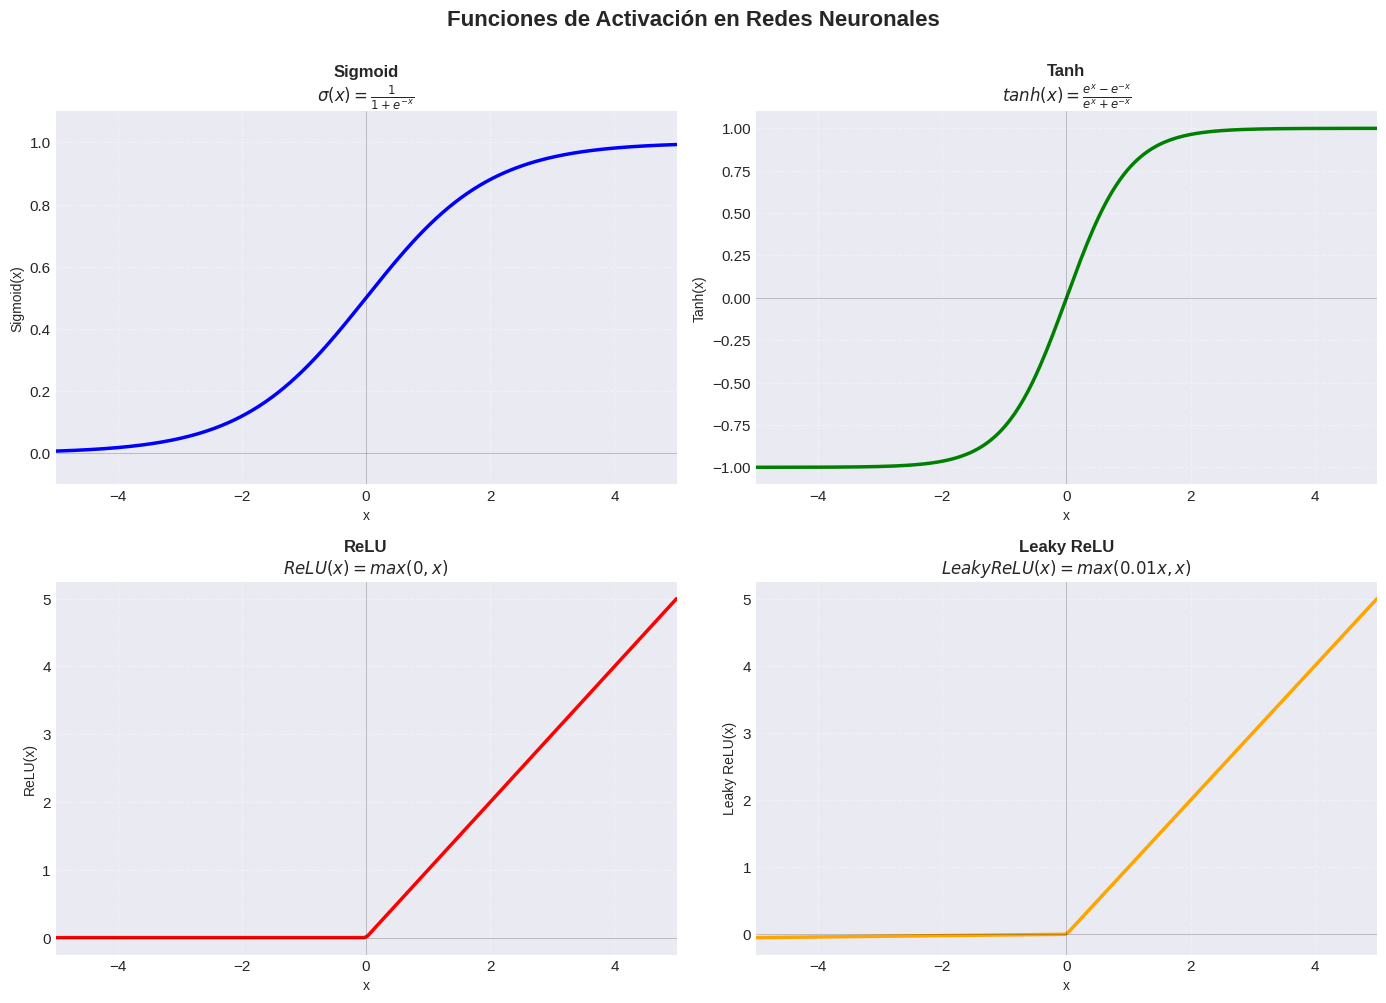

Funciones de activación visualizadas
  • Sigmoid: rango (0, 1) - usado en capas de salida para clasificación binaria
  • Tanh: rango (-1, 1) - centra los datos alrededor de 0
  • ReLU: soluciona el problema del gradiente desvaneciente
  • Leaky ReLU: previene 'neuronas muertas' del ReLU


In [ ]:
# Definir el rango de valores
x = np.linspace(-5, 5, 200)

# Funciones de activación comunes
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)
leaky_relu = np.where(x > 0, x, 0.01 * x)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Configuración de cada función
activations = [
    (sigmoid, 'Sigmoid', 'blue', r'$\sigma(x) = \frac{1}{1+e^{-x}}$'),
    (tanh, 'Tanh', 'green', r'$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$'),
    (relu, 'ReLU', 'red', r'$ReLU(x) = max(0, x)$'),
    (leaky_relu, 'Leaky ReLU', 'orange', r'$LeakyReLU(x) = max(0.01x, x)$')
]

# Graficar cada función de activación
for idx, (func, name, color, formula) in enumerate(activations):
    ax = axes[idx]
    ax.plot(x, func, color=color, linewidth=2.5, label=name)
    ax.axhline(y=0, color='black', linewidth=0.5, linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='black', linewidth=0.5, linestyle='-', alpha=0.3)
    ax.set_title(f'{name}\n{formula}', fontsize=12, fontweight='bold')
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel(f'{name}(x)', fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(-5, 5)

    # Ajustar límites en Y según la función
    if name in ['Sigmoid']:
        ax.set_ylim(-0.1, 1.1)
    elif name == 'Tanh':
        ax.set_ylim(-1.1, 1.1)

plt.suptitle('Funciones de Activación en Redes Neuronales',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("Funciones de activación visualizadas")
print("  • Sigmoid: rango (0, 1) - usado en capas de salida para clasificación binaria")
print("  • Tanh: rango (-1, 1) - centra los datos alrededor de 0")
print("  • ReLU: soluciona el problema del gradiente desvaneciente")
print("  • Leaky ReLU: previene 'neuronas muertas' del ReLU")

### **3.2 Scatter Plots: Visualización de Datasets**

Los scatter plots son esenciales para visualizar datos de clasificación en 2D y entender la distribución de nuestras clases.



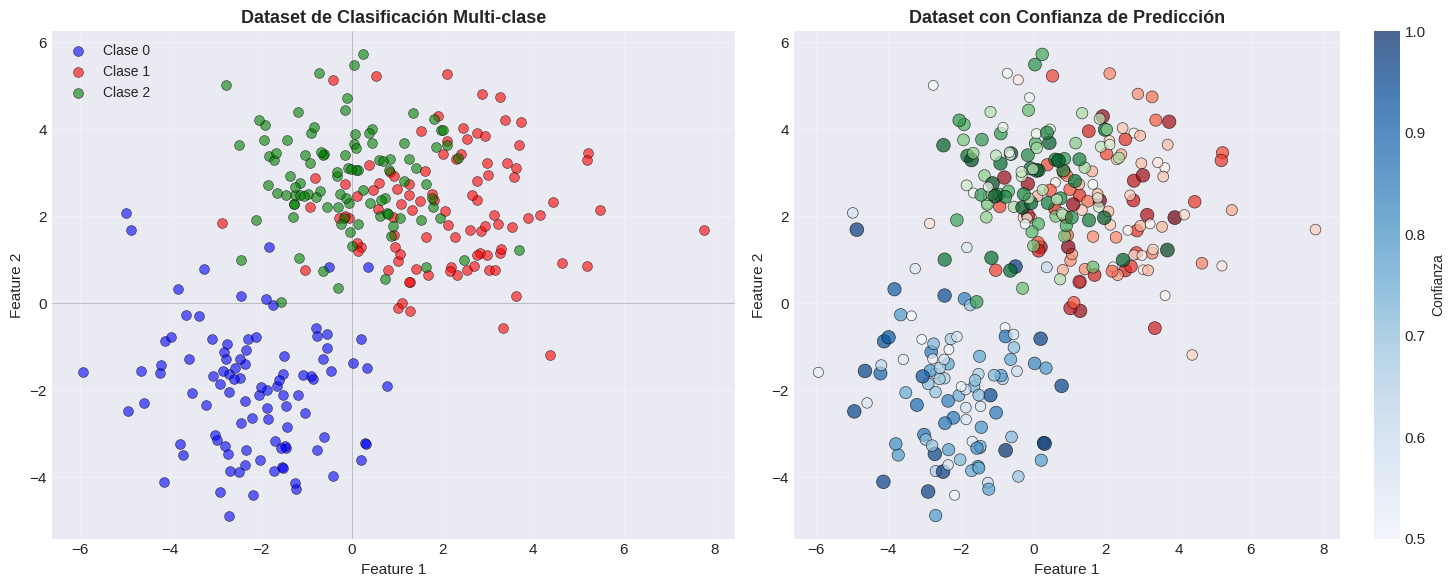

✓ Scatter plots creados
  • Total de puntos: 300
  • El tamaño y color representan la confianza de la predicción
  • Útil para identificar separabilidad entre clases


In [ ]:
# Generar un dataset sintético de clasificación binaria
np.random.seed(42)

# Clase 0: centrada en (-2, -2)
n_samples = 100
class_0_x = np.random.randn(n_samples) * 1.5 - 2
class_0_y = np.random.randn(n_samples) * 1.5 - 2

# Clase 1: centrada en (2, 2)
class_1_x = np.random.randn(n_samples) * 1.5 + 2
class_1_y = np.random.randn(n_samples) * 1.5 + 2

# Clase 2: centrada en (0, 3)
class_2_x = np.random.randn(n_samples) * 1.2 + 0
class_2_y = np.random.randn(n_samples) * 1.2 + 3

# Crear figura con dos visualizaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ========== GRÁFICO 1: Scatter básico ==========
ax1.scatter(class_0_x, class_0_y, c='blue', alpha=0.6, s=50,
            label='Clase 0', edgecolors='black', linewidth=0.5)
ax1.scatter(class_1_x, class_1_y, c='red', alpha=0.6, s=50,
            label='Clase 1', edgecolors='black', linewidth=0.5)
ax1.scatter(class_2_x, class_2_y, c='green', alpha=0.6, s=50,
            label='Clase 2', edgecolors='black', linewidth=0.5)

ax1.set_title('Dataset de Clasificación Multi-clase', fontsize=13, fontweight='bold')
ax1.set_xlabel('Feature 1', fontsize=11)
ax1.set_ylabel('Feature 2', fontsize=11)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linewidth=0.5, alpha=0.3)
ax1.axvline(x=0, color='black', linewidth=0.5, alpha=0.3)

# ========== GRÁFICO 2: Con tamaños variables y colormap ==========
# Simular una tercera dimensión (por ejemplo, confianza de predicción)
confidence_0 = np.random.uniform(0.5, 1.0, n_samples)
confidence_1 = np.random.uniform(0.5, 1.0, n_samples)
confidence_2 = np.random.uniform(0.5, 1.0, n_samples)

scatter_0 = ax2.scatter(class_0_x, class_0_y, c=confidence_0, cmap='Blues',
                        alpha=0.7, s=confidence_0*100, edgecolors='black',
                        linewidth=0.5, vmin=0.5, vmax=1.0)
scatter_1 = ax2.scatter(class_1_x, class_1_y, c=confidence_1, cmap='Reds',
                        alpha=0.7, s=confidence_1*100, edgecolors='black',
                        linewidth=0.5, vmin=0.5, vmax=1.0)
scatter_2 = ax2.scatter(class_2_x, class_2_y, c=confidence_2, cmap='Greens',
                        alpha=0.7, s=confidence_2*100, edgecolors='black',
                        linewidth=0.5, vmin=0.5, vmax=1.0)

ax2.set_title('Dataset con Confianza de Predicción', fontsize=13, fontweight='bold')
ax2.set_xlabel('Feature 1', fontsize=11)
ax2.set_ylabel('Feature 2', fontsize=11)
ax2.grid(True, alpha=0.3)

# Añadir colorbar
cbar = plt.colorbar(scatter_0, ax=ax2)
cbar.set_label('Confianza', fontsize=10)

plt.tight_layout()
plt.show()

print("Scatter plots creados")
print(f"  • Total de puntos: {3 * n_samples}")
print(f"  • El tamaño y color representan la confianza de la predicción")
print(f"  • Útil para identificar separabilidad entre clases")

### **3.3 Histogramas: Análisis de Distribución**

Los histogramas son fundamentales para entender la distribución de nuestros datos antes y después de preprocesamiento (normalización, estandarización).

En Machine Learning, es crucial analizar cómo están distribuidos nuestros datos porque:
- Muchos algoritmos asumen distribuciones específicas
- Detectamos valores atípicos (outliers)
- Decidimos qué tipo de normalización aplicar

Veremos tres casos comunes:



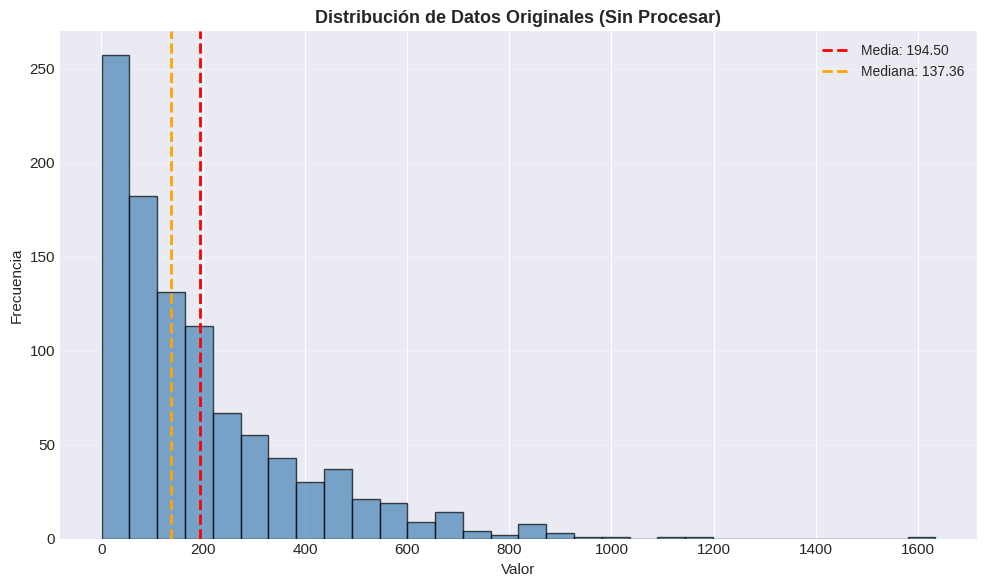

📊 Estadísticas de datos originales:
  • Mínimo: 0.93
  • Máximo: 1634.49
  • Media: 194.50
  • Mediana: 137.36
  • Desviación estándar: 194.40

  ⚠️ Datos muy dispersos - dificulta el entrenamiento de modelos


In [ ]:
# Generar datos con distribución exponencial (común en datos del mundo real)
np.random.seed(42)
raw_data = np.random.exponential(scale=2.0, size=1000) * 100

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma de datos originales
ax.hist(raw_data, bins=30, color='steelblue', alpha=0.7, edgecolor='black')

# Líneas de referencia
ax.axvline(raw_data.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media: {raw_data.mean():.2f}')
ax.axvline(np.median(raw_data), color='orange', linestyle='--', linewidth=2,
           label=f'Mediana: {np.median(raw_data):.2f}')

# Personalización
ax.set_title('Distribución de Datos Originales (Sin Procesar)',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Valor', fontsize=11)
ax.set_ylabel('Frecuencia', fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 Estadísticas de datos originales:")
print(f"  • Mínimo: {raw_data.min():.2f}")
print(f"  • Máximo: {raw_data.max():.2f}")
print(f"  • Media: {raw_data.mean():.2f}")
print(f"  • Mediana: {np.median(raw_data):.2f}")
print(f"  • Desviación estándar: {raw_data.std():.2f}")
print(f"\n  ⚠️ Datos muy dispersos - dificulta el entrenamiento de modelos")

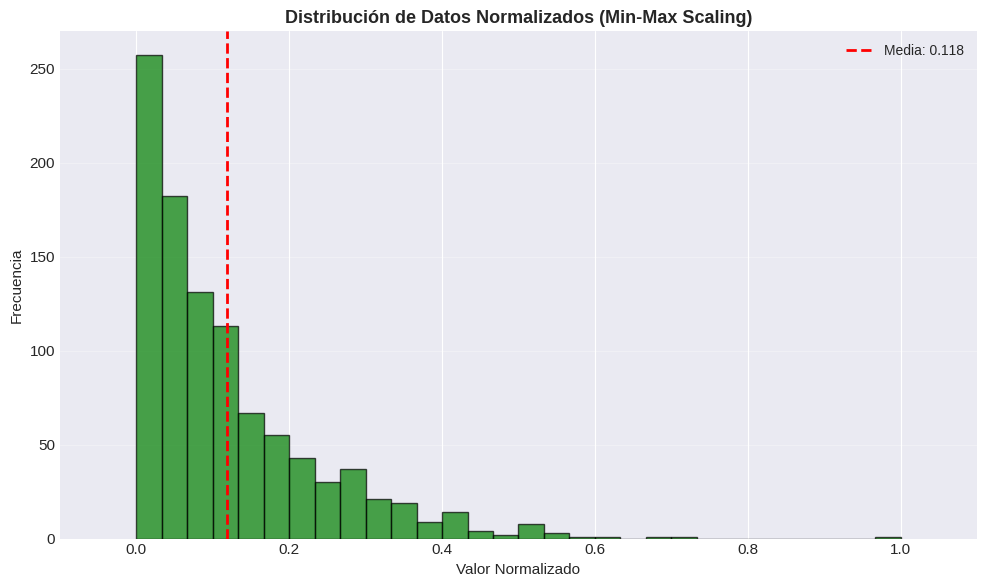

📊 Estadísticas de datos normalizados:
  • Mínimo: 0.000
  • Máximo: 1.000
  • Media: 0.118
  • Desviación estándar: 0.119

  ✓ Todos los valores ahora están en el rango [0, 1]
  💡 Útil para algoritmos sensibles a la escala (ej: K-Means, redes neuronales)


In [ ]:
# Aplicar normalización Min-Max: escala los datos al rango [0, 1]
normalized_data = (raw_data - raw_data.min()) / (raw_data.max() - raw_data.min())

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma de datos normalizados
ax.hist(normalized_data, bins=30, color='green', alpha=0.7, edgecolor='black')

# Línea de referencia
ax.axvline(normalized_data.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media: {normalized_data.mean():.3f}')

# Personalización
ax.set_title('Distribución de Datos Normalizados (Min-Max Scaling)',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Valor Normalizado', fontsize=11)
ax.set_ylabel('Frecuencia', fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
ax.set_xlim(-0.1, 1.1)

plt.tight_layout()
plt.show()

print("📊 Estadísticas de datos normalizados:")
print(f"  • Mínimo: {normalized_data.min():.3f}")
print(f"  • Máximo: {normalized_data.max():.3f}")
print(f"  • Media: {normalized_data.mean():.3f}")
print(f"  • Desviación estándar: {normalized_data.std():.3f}")
print(f"\n  ✓ Todos los valores ahora están en el rango [0, 1]")
print(f"  💡 Útil para algoritmos sensibles a la escala (ej: K-Means, redes neuronales)")

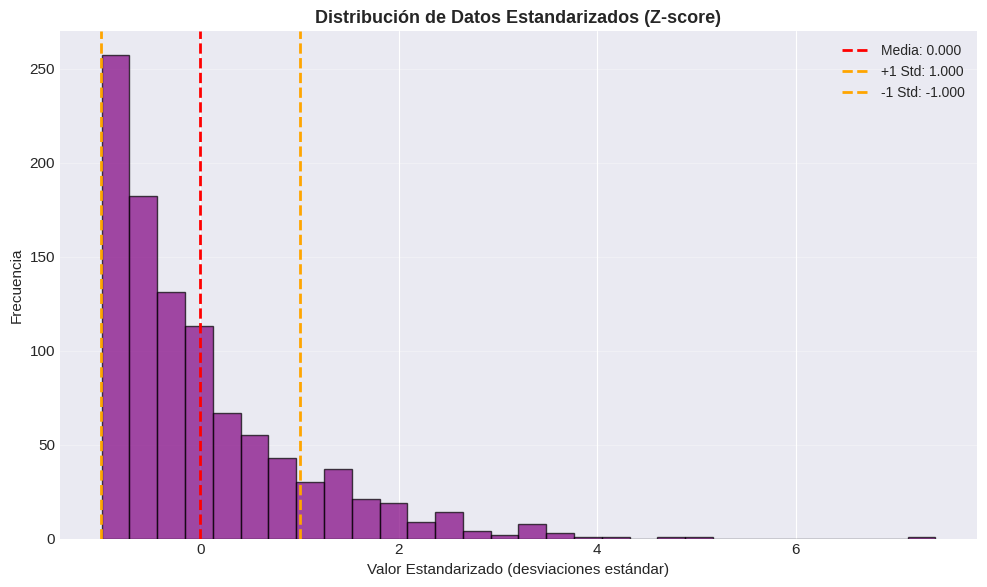

📊 Estadísticas de datos estandarizados:
  • Mínimo: -0.996
  • Máximo: 7.407
  • Media: 0.000
  • Desviación estándar: 1.000

  ✓ Datos centrados en 0 con desviación estándar de 1
  💡 Útil para algoritmos que asumen distribución normal (ej: regresión logística, SVM)
  💡 Facilita la comparación entre diferentes features con distintas escalas


In [ ]:
# Aplicar estandarización Z-score: centra los datos en media=0 y desviación estándar=1
standardized_data = (raw_data - raw_data.mean()) / raw_data.std()

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma de datos estandarizados
ax.hist(standardized_data, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Líneas de referencia
ax.axvline(0, color='red', linestyle='--', linewidth=2,
           label=f'Media: {standardized_data.mean():.3f}')
ax.axvline(standardized_data.std(), color='orange', linestyle='--', linewidth=2,
           label=f'+1 Std: {standardized_data.std():.3f}')
ax.axvline(-standardized_data.std(), color='orange', linestyle='--', linewidth=2,
           label=f'-1 Std: {-standardized_data.std():.3f}')

# Personalización
ax.set_title('Distribución de Datos Estandarizados (Z-score)',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Valor Estandarizado (desviaciones estándar)', fontsize=11)
ax.set_ylabel('Frecuencia', fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 Estadísticas de datos estandarizados:")
print(f"  • Mínimo: {standardized_data.min():.3f}")
print(f"  • Máximo: {standardized_data.max():.3f}")
print(f"  • Media: {standardized_data.mean():.3f}")
print(f"  • Desviación estándar: {standardized_data.std():.3f}")
print(f"\n  ✓ Datos centrados en 0 con desviación estándar de 1")
print(f"  💡 Útil para algoritmos que asumen distribución normal (ej: regresión logística, SVM)")
print(f"  💡 Facilita la comparación entre diferentes features con distintas escalas")

---

### **3.4 Heatmaps: Visualización de Matrices**

Los heatmaps son fundamentales para visualizar matrices en IA, especialmente:
- **Matrices de confusión**: evaluar el desempeño de clasificadores
- **Matrices de correlación**: detectar relaciones entre features
- **Pesos de redes neuronales**: entender qué aprende el modelo

---

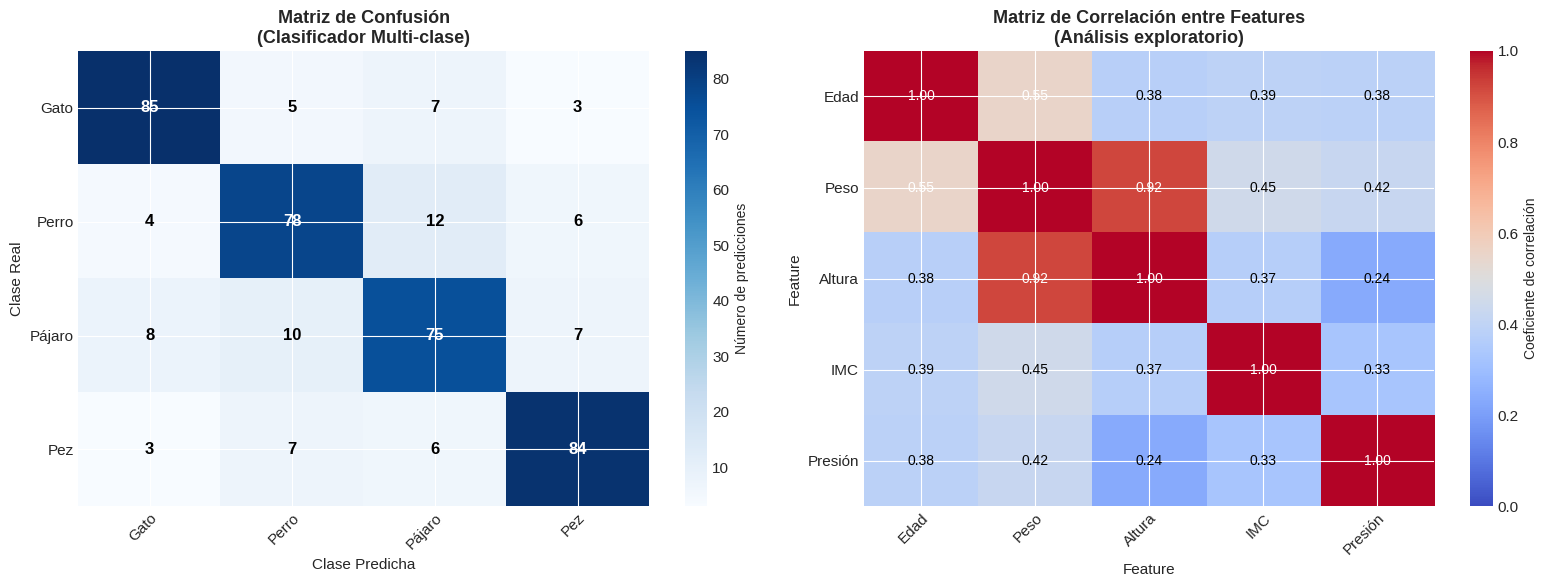


📊 Matriz de Confusión:
  • Accuracy del modelo: 80.50%
  • Clase mejor clasificada: Gato (85 correctos)

📊 Matriz de Correlación:
  • Features con mayor correlación ayudan a identificar redundancia
  • Valores cercanos a 1: fuerte correlación positiva
  • Valores cercanos a 0: sin correlación


In [ ]:
# ========== EJEMPLO 1: Matriz de Confusión ==========

# Simular resultados de un clasificador de 4 clases
# Filas: clases reales, Columnas: clases predichas
confusion_matrix = np.array([
    [85, 5, 7, 3],    # Clase 0: 85 correctos, 15 errores
    [4, 78, 12, 6],   # Clase 1: 78 correctos
    [8, 10, 75, 7],   # Clase 2: 75 correctos
    [3, 7, 6, 84]     # Clase 3: 84 correctos
])

class_names = ['Gato', 'Perro', 'Pájaro', 'Pez']

# Crear figura con dos heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ========== HEATMAP 1: Matriz de Confusión ==========
im1 = ax1.imshow(confusion_matrix, cmap='Blues', aspect='auto')

# Añadir colorbar
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label('Número de predicciones', fontsize=10)

# Configurar ticks y labels
ax1.set_xticks(np.arange(len(class_names)))
ax1.set_yticks(np.arange(len(class_names)))
ax1.set_xticklabels(class_names)
ax1.set_yticklabels(class_names)

# Rotar labels del eje X
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Añadir los valores numéricos en cada celda
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax1.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="white" if confusion_matrix[i, j] > 50 else "black",
                       fontsize=12, fontweight='bold')

ax1.set_title('Matriz de Confusión\n(Clasificador Multi-clase)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Clase Predicha', fontsize=11)
ax1.set_ylabel('Clase Real', fontsize=11)

# ========== HEATMAP 2: Matriz de Correlación ==========

# Simular correlación entre 5 features
np.random.seed(42)
n_features = 5
correlation_matrix = np.random.rand(n_features, n_features)
# Hacer la matriz simétrica
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2
# Diagonal en 1 (correlación perfecta consigo mismo)
np.fill_diagonal(correlation_matrix, 1)

feature_names = ['Edad', 'Peso', 'Altura', 'IMC', 'Presión']

im2 = ax2.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=0, vmax=1)

# Añadir colorbar
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label('Coeficiente de correlación', fontsize=10)

# Configurar ticks y labels
ax2.set_xticks(np.arange(len(feature_names)))
ax2.set_yticks(np.arange(len(feature_names)))
ax2.set_xticklabels(feature_names)
ax2.set_yticklabels(feature_names)

# Rotar labels del eje X
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Añadir los valores numéricos en cada celda
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax2.text(j, i, f'{correlation_matrix[i, j]:.2f}',
                       ha="center", va="center",
                       color="white" if correlation_matrix[i, j] > 0.5 else "black",
                       fontsize=10)

ax2.set_title('Matriz de Correlación entre Features\n(Análisis exploratorio)',
              fontsize=13, fontweight='bold')
ax2.set_xlabel('Feature', fontsize=11)
ax2.set_ylabel('Feature', fontsize=11)

plt.tight_layout()
plt.show()

# Calcular accuracy de la matriz de confusión
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print(f"\n📊 Matriz de Confusión:")
print(f"  • Accuracy del modelo: {accuracy:.2%}")
print(f"  • Clase mejor clasificada: {class_names[np.diag(confusion_matrix).argmax()]} ({np.diag(confusion_matrix).max()} correctos)")
print(f"\n📊 Matriz de Correlación:")
print(f"  • Features con mayor correlación ayudan a identificar redundancia")
print(f"  • Valores cercanos a 1: fuerte correlación positiva")
print(f"  • Valores cercanos a 0: sin correlación")

---

### **3.5 Subplots: Comparación de Múltiples Experimentos**

En IA es común entrenar múltiples modelos con diferentes hiperparámetros. Los subplots nos permiten comparar resultados lado a lado.

Simularemos el entrenamiento de 4 modelos con diferentes learning rates.

---

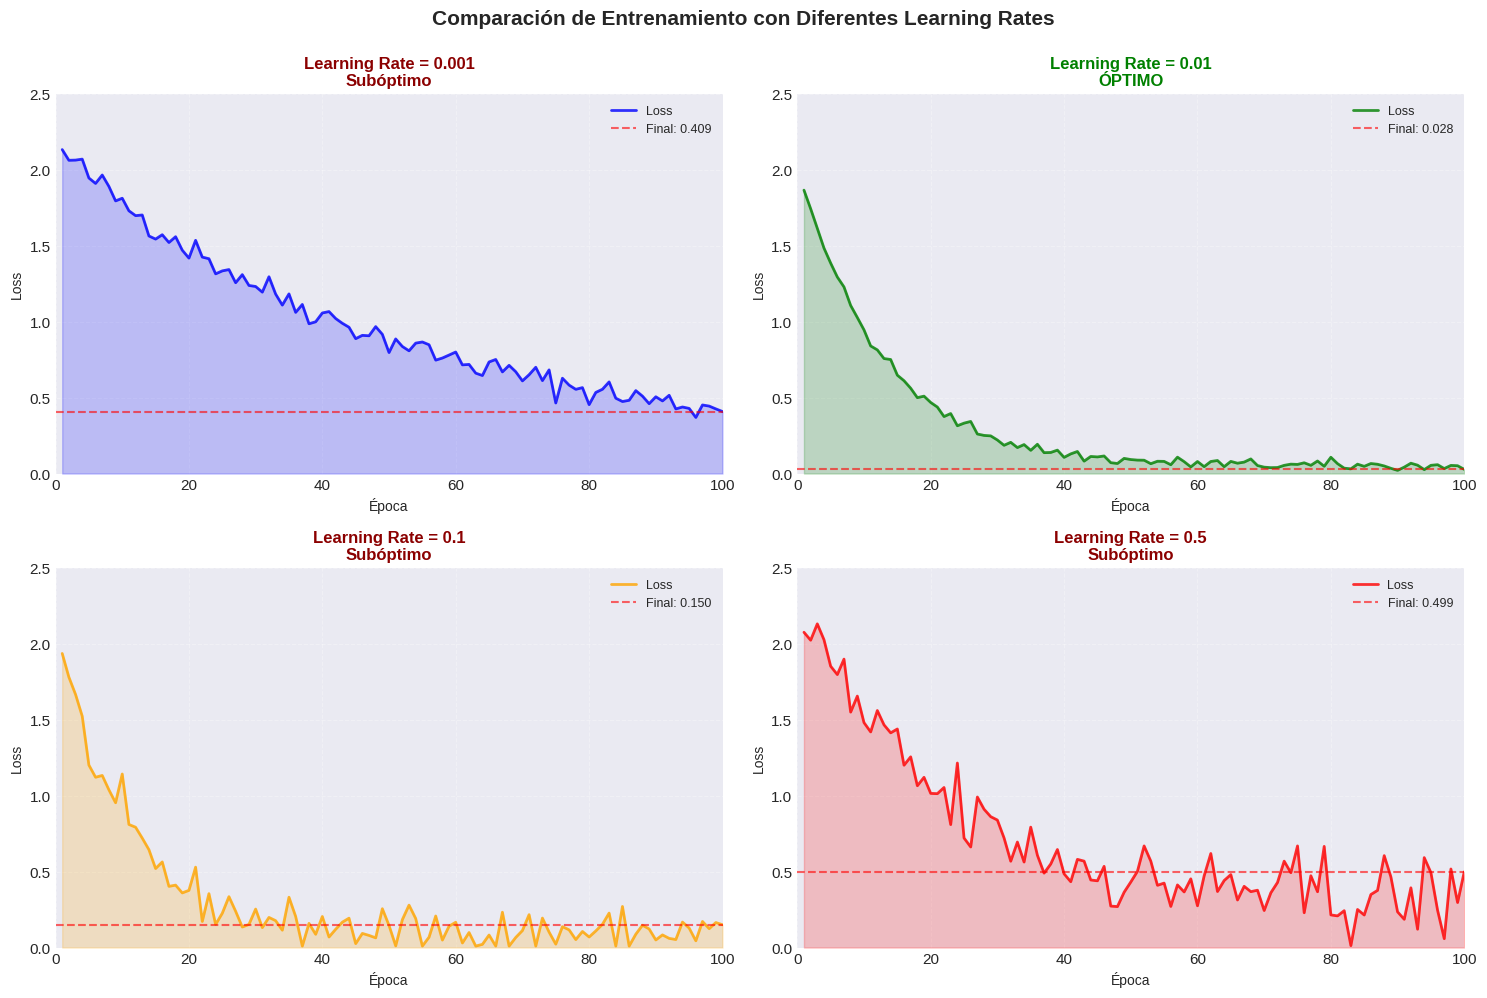

✓ Comparación de experimentos creada

📊 Resultados finales:
  • LR = 0.001 → Loss final: 0.409
  • LR = 0.010 → Loss final: 0.028
  • LR = 0.100 → Loss final: 0.150
  • LR = 0.500 → Loss final: 0.499

💡 Mejor learning rate: 0.01
  • LR muy bajo (0.001): aprende lento, necesita más épocas
  • LR óptimo (0.01): converge rápido y estable
  • LR alto (0.1): inestable pero converge
  • LR muy alto (0.5): muy inestable, pérdida errática


In [ ]:
# Simular entrenamiento de 4 modelos con diferentes learning rates
np.random.seed(42)
epochs = np.arange(1, 101)

# Diferentes learning rates y sus curvas de pérdida
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'orange', 'red']

# Generar curvas de pérdida para cada learning rate
losses = []
for lr in learning_rates:
    if lr == 0.001:
        # Learning rate muy bajo: converge lento
        loss = 2.0 * np.exp(-0.02 * epochs) + 0.15 + np.random.normal(0, 0.05, len(epochs))
    elif lr == 0.01:
        # Learning rate óptimo: converge bien
        loss = 2.0 * np.exp(-0.08 * epochs) + 0.05 + np.random.normal(0, 0.02, len(epochs))
    elif lr == 0.1:
        # Learning rate alto: algo inestable
        loss = 2.0 * np.exp(-0.1 * epochs) + 0.1 + np.random.normal(0, 0.08, len(epochs))
    else:
        # Learning rate muy alto: muy inestable
        loss = 2.0 * np.exp(-0.05 * epochs) + 0.3 + np.random.normal(0, 0.15, len(epochs))

    losses.append(np.maximum(loss, 0.01))  # Evitar valores negativos

# Crear figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Graficar cada experimento
for idx, (lr, loss, color) in enumerate(zip(learning_rates, losses, colors)):
    ax = axes[idx]

    # Graficar curva de pérdida
    ax.plot(epochs, loss, color=color, linewidth=2, alpha=0.8, label=f'Loss')
    ax.fill_between(epochs, loss, alpha=0.2, color=color)

    # Añadir línea horizontal para el valor final
    final_loss = loss[-1]
    ax.axhline(y=final_loss, color='red', linestyle='--', linewidth=1.5,
               alpha=0.6, label=f'Final: {final_loss:.3f}')

    # Personalización
    ax.set_title(f'Learning Rate = {lr}\n{"ÓPTIMO" if lr == 0.01 else "Subóptimo"}',
                 fontsize=12, fontweight='bold',
                 color='green' if lr == 0.01 else 'darkred')
    ax.set_xlabel('Época', fontsize=10)
    ax.set_ylabel('Loss', fontsize=10)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_ylim(0, 2.5)
    ax.set_xlim(0, 100)

plt.suptitle('Comparación de Entrenamiento con Diferentes Learning Rates',
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Resumen de resultados
print("✓ Comparación de experimentos creada\n")
print("📊 Resultados finales:")
for lr, loss in zip(learning_rates, losses):
    print(f"  • LR = {lr:5.3f} → Loss final: {loss[-1]:.3f}")

print(f"\n💡 Mejor learning rate: {learning_rates[np.argmin([l[-1] for l in losses])]}")
print("  • LR muy bajo (0.001): aprende lento, necesita más épocas")
print("  • LR óptimo (0.01): converge rápido y estable")
print("  • LR alto (0.1): inestable pero converge")
print("  • LR muy alto (0.5): muy inestable, pérdida errática")

## **4. Personalización Esencial**

La personalización adecuada hace que nuestros gráficos sean profesionales y fáciles de interpretar. Esto es crucial para papers, presentaciones y reportes.

### **4.1 Títulos, Etiquetas y Leyendas**

Aprenderemos a personalizar los elementos textuales de nuestros gráficos.

---

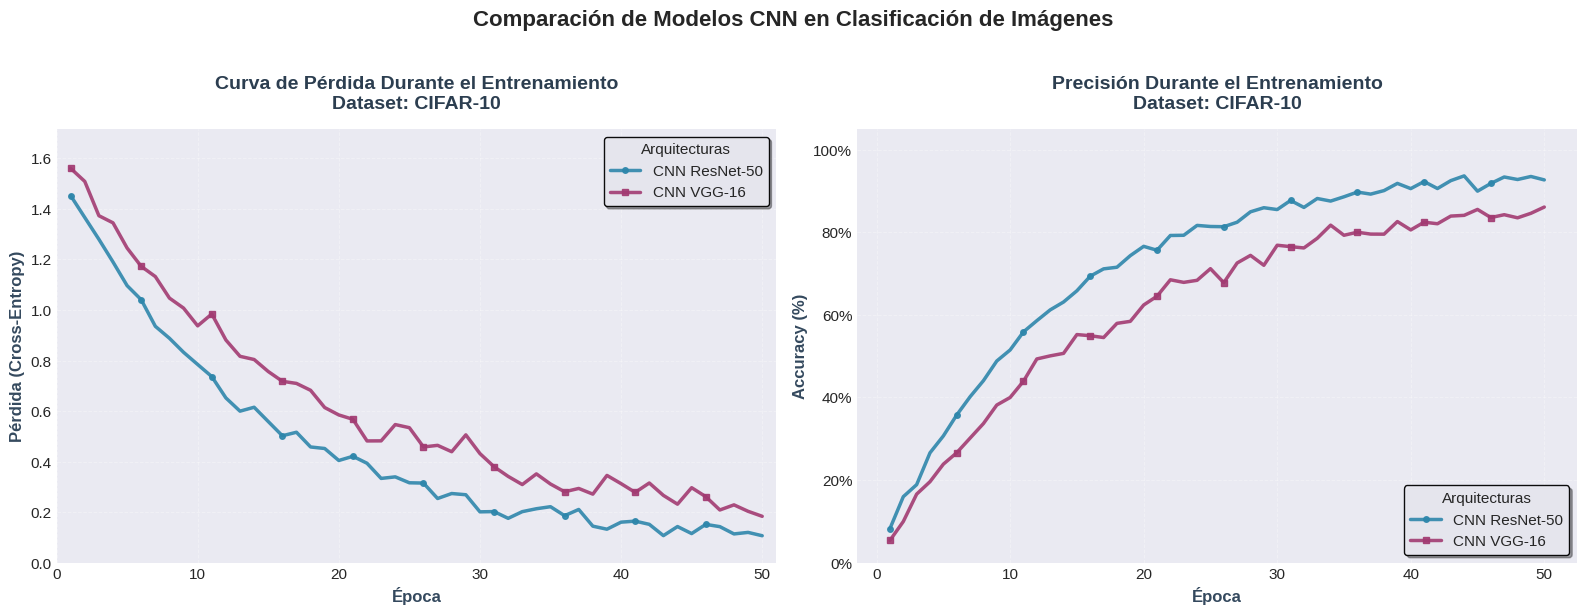

✓ Gráfico con personalización completa creado

📝 Elementos personalizados:
  • Títulos principales y subtítulos
  • Etiquetas de ejes con formato (negrita, color)
  • Leyendas con sombra y marco personalizado
  • Grid con transparencia
  • Formateo de eje Y como porcentaje
  • Colores personalizados (códigos hex)
  • Marcadores diferentes para cada serie


In [ ]:
# Datos de ejemplo: comparación de dos modelos
epochs = np.arange(1, 51)
model_a_loss = 1.5 * np.exp(-0.08 * epochs) + 0.1 + np.random.normal(0, 0.02, len(epochs))
model_b_loss = 1.5 * np.exp(-0.06 * epochs) + 0.15 + np.random.normal(0, 0.03, len(epochs))

model_a_acc = (1 - np.exp(-0.08 * epochs)) * 0.95 + np.random.normal(0, 0.01, len(epochs))
model_b_acc = (1 - np.exp(-0.06 * epochs)) * 0.90 + np.random.normal(0, 0.015, len(epochs))

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ========== SUBPLOT 1: Pérdida (Loss) ==========
ax1.plot(epochs, model_a_loss, color='#2E86AB', linewidth=2.5,
         marker='o', markersize=4, markevery=5, label='CNN ResNet-50', alpha=0.9)
ax1.plot(epochs, model_b_loss, color='#A23B72', linewidth=2.5,
         marker='s', markersize=4, markevery=5, label='CNN VGG-16', alpha=0.9)

# Título principal con múltiples líneas y formato
ax1.set_title('Curva de Pérdida Durante el Entrenamiento\nDataset: CIFAR-10',
              fontsize=14, fontweight='bold', pad=15, color='#2C3E50')

# Etiquetas de ejes con formato
ax1.set_xlabel('Época', fontsize=12, fontweight='bold', color='#34495E')
ax1.set_ylabel('Pérdida (Cross-Entropy)', fontsize=12, fontweight='bold', color='#34495E')

# Leyenda personalizada
ax1.legend(loc='upper right', fontsize=11, frameon=True, shadow=True,
           fancybox=True, framealpha=0.95, edgecolor='black',
           title='Arquitecturas', title_fontsize=11)

# Grid personalizado
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)

# Límites de los ejes
ax1.set_xlim(0, 51)
ax1.set_ylim(0, max(model_a_loss.max(), model_b_loss.max()) * 1.1)

# ========== SUBPLOT 2: Accuracy ==========
ax2.plot(epochs, model_a_acc, color='#2E86AB', linewidth=2.5,
         marker='o', markersize=4, markevery=5, label='CNN ResNet-50', alpha=0.9)
ax2.plot(epochs, model_b_acc, color='#A23B72', linewidth=2.5,
         marker='s', markersize=4, markevery=5, label='CNN VGG-16', alpha=0.9)

# Título con subtítulo
ax2.set_title('Precisión Durante el Entrenamiento\nDataset: CIFAR-10',
              fontsize=14, fontweight='bold', pad=15, color='#2C3E50')

# Etiquetas
ax2.set_xlabel('Época', fontsize=12, fontweight='bold', color='#34495E')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold', color='#34495E')

# Leyenda en otra posición
ax2.legend(loc='lower right', fontsize=11, frameon=True, shadow=True,
           fancybox=True, framealpha=0.95, edgecolor='black',
           title='Arquitecturas', title_fontsize=11)

# Grid
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)

# Formatear eje Y como porcentaje
ax2.set_ylim(0, 1.05)
ax2.set_yticks(np.arange(0, 1.1, 0.2))
ax2.set_yticklabels([f'{int(x*100)}%' for x in np.arange(0, 1.1, 0.2)])

# Título general de la figura
fig.suptitle('Comparación de Modelos CNN en Clasificación de Imágenes',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

print("✓ Gráfico con personalización completa creado")
print("\n📝 Elementos personalizados:")
print("  • Títulos principales y subtítulos")
print("  • Etiquetas de ejes con formato (negrita, color)")
print("  • Leyendas con sombra y marco personalizado")
print("  • Grid con transparencia")
print("  • Formateo de eje Y como porcentaje")
print("  • Colores personalizados (códigos hex)")
print("  • Marcadores diferentes para cada serie")

---

### **4.2 Colores y Estilos**

Los colores y estilos adecuados mejoran la legibilidad y el impacto visual de nuestros gráficos. Son especialmente importantes para publicaciones y presentaciones.

---

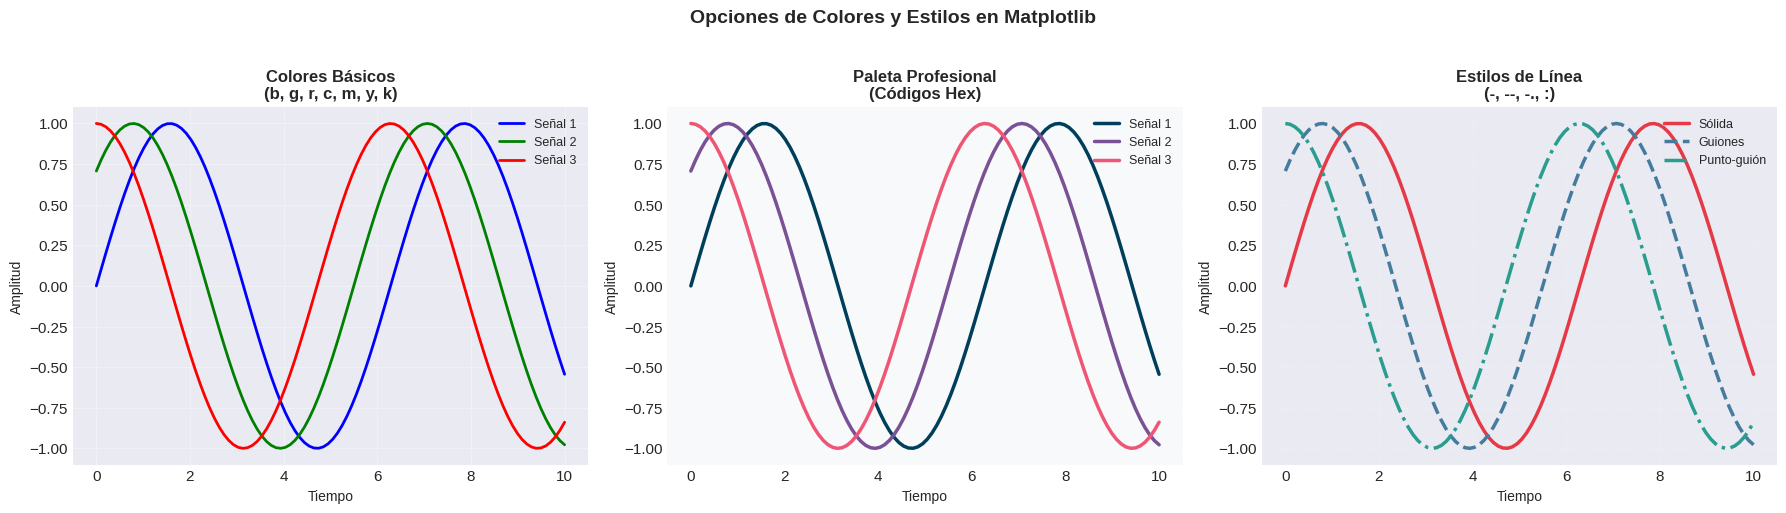

✓ Ejemplos de colores y estilos creados

🎨 Opciones de colores:
  • Básicos: 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
  • Nombres: 'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white'
  • Hex: '#003f5c', '#7a5195', '#ef5675'
  • RGB: (0.1, 0.2, 0.5) con valores entre 0 y 1

📏 Estilos de línea:
  • '-'  : línea sólida
  • '--' : guiones
  • '-.' : punto-guión
  • ':'  : puntos

💡 Recomendación: usar paletas de color accesibles para personas con daltonismo
   Herramientas: ColorBrewer, Seaborn palettes


In [ ]:
# Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.sin(x + np.pi/4)
y3 = np.sin(x + np.pi/2)

# Crear figura con 3 ejemplos de estilos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ========== ESTILO 1: Colores básicos de Matplotlib ==========
ax1 = axes[0]
ax1.plot(x, y1, 'b-', linewidth=2, label='Señal 1')      # blue
ax1.plot(x, y2, 'g-', linewidth=2, label='Señal 2')      # green
ax1.plot(x, y3, 'r-', linewidth=2, label='Señal 3')      # red

ax1.set_title('Colores Básicos\n(b, g, r, c, m, y, k)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tiempo', fontsize=10)
ax1.set_ylabel('Amplitud', fontsize=10)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)

# ========== ESTILO 2: Paleta profesional (códigos hex) ==========
ax2 = axes[1]
professional_colors = ['#003f5c', '#7a5195', '#ef5675']  # Paleta moderna
ax2.plot(x, y1, color=professional_colors[0], linewidth=2.5, label='Señal 1')
ax2.plot(x, y2, color=professional_colors[1], linewidth=2.5, label='Señal 2')
ax2.plot(x, y3, color=professional_colors[2], linewidth=2.5, label='Señal 3')

ax2.set_title('Paleta Profesional\n(Códigos Hex)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Tiempo', fontsize=10)
ax2.set_ylabel('Amplitud', fontsize=10)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#f8f9fa')  # Fondo gris claro

# ========== ESTILO 3: Estilos de línea variados ==========
ax3 = axes[2]
ax3.plot(x, y1, color='#E63946', linewidth=2.5, linestyle='-', label='Sólida')
ax3.plot(x, y2, color='#457B9D', linewidth=2.5, linestyle='--', label='Guiones')
ax3.plot(x, y3, color='#2A9D8F', linewidth=2.5, linestyle='-.', label='Punto-guión')

ax3.set_title('Estilos de Línea\n(-, --, -., :)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Tiempo', fontsize=10)
ax3.set_ylabel('Amplitud', fontsize=10)
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3, linestyle=':')

plt.suptitle('Opciones de Colores y Estilos en Matplotlib', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Información adicional
print("✓ Ejemplos de colores y estilos creados\n")
print("🎨 Opciones de colores:")
print("  • Básicos: 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'")
print("  • Nombres: 'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white'")
print("  • Hex: '#003f5c', '#7a5195', '#ef5675'")
print("  • RGB: (0.1, 0.2, 0.5) con valores entre 0 y 1")
print("\n📏 Estilos de línea:")
print("  • '-'  : línea sólida")
print("  • '--' : guiones")
print("  • '-.' : punto-guión")
print("  • ':'  : puntos")
print("\n💡 Recomendación: usar paletas de color accesibles para personas con daltonismo")
print("   Herramientas: ColorBrewer, Seaborn palettes")

---

### **4.3 Escalas y Grids**

Las escalas logarítmicas son esenciales para visualizar curvas de pérdida y métricas que varían en varios órdenes de magnitud. Los grids mejoran la lectura de valores.

---

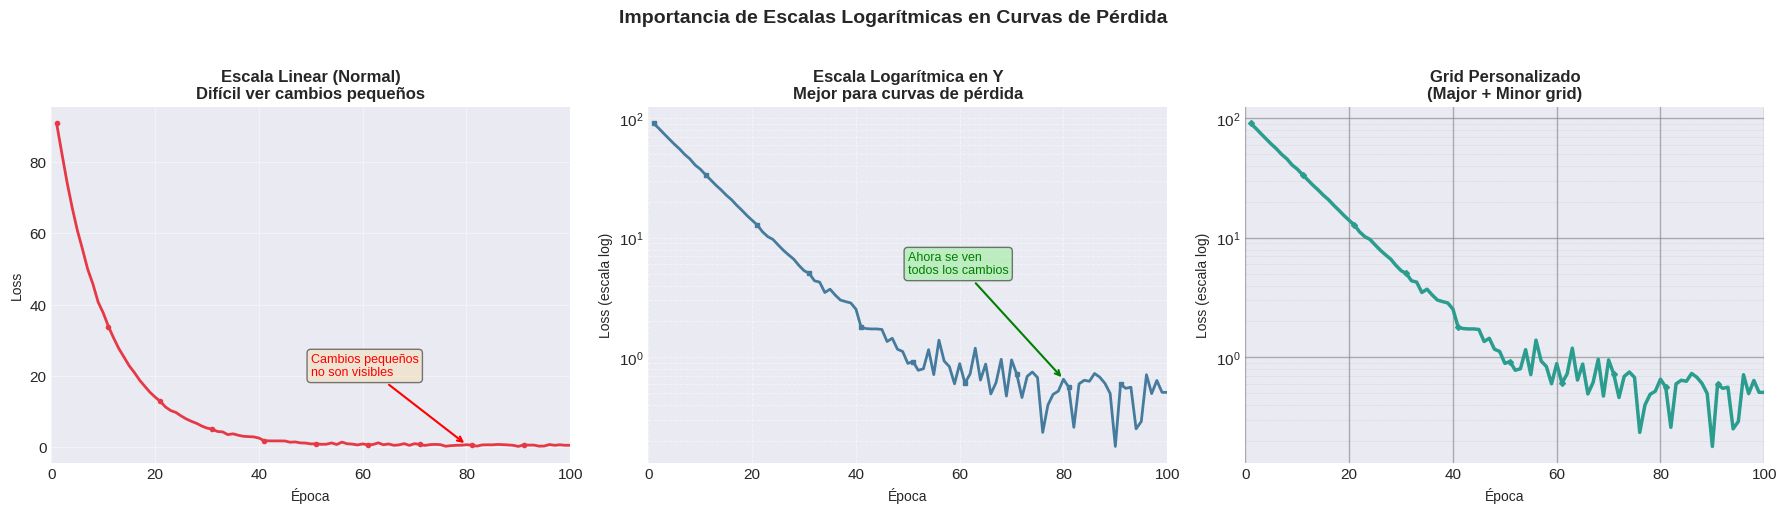

✓ Comparación de escalas creada

📊 Información sobre escalas:
  • Escala Linear: mejor para datos con rango pequeño
  • Escala Log: esencial para pérdidas que varían en órdenes de magnitud
  • Log hace visible el progreso en etapas avanzadas del entrenamiento

🔲 Tipos de Grid:
  • which='major': líneas en valores principales (1, 10, 100...)
  • which='minor': líneas en valores intermedios (2, 3, 4... 20, 30...)
  • which='both': combina ambos grids

💡 En este ejemplo:
  • Pérdida inicial: 90.88
  • Pérdida final: 0.51
  • Reducción: 99.4%


In [ ]:
# Simular curva de pérdida típica que decrece rápidamente al inicio
epochs = np.arange(1, 101)
loss_values = 100 * np.exp(-0.1 * epochs) + 0.5 + np.random.normal(0, 0.2, len(epochs))
loss_values = np.maximum(loss_values, 0.1)  # Evitar valores negativos

# Crear figura con 3 comparaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ========== GRÁFICO 1: Escala Linear (Normal) ==========
ax1 = axes[0]
ax1.plot(epochs, loss_values, color='#E63946', linewidth=2, marker='o',
         markersize=3, markevery=10)

ax1.set_title('Escala Linear (Normal)\nDifícil ver cambios pequeños',
              fontsize=12, fontweight='bold')
ax1.set_xlabel('Época', fontsize=10)
ax1.set_ylabel('Loss', fontsize=10)
ax1.grid(True, alpha=0.4, linestyle='-', linewidth=0.7)
ax1.set_xlim(0, 100)

# ========== GRÁFICO 2: Escala Logarítmica en Y ==========
ax2 = axes[1]
ax2.plot(epochs, loss_values, color='#457B9D', linewidth=2, marker='s',
         markersize=3, markevery=10)

ax2.set_yscale('log')  # Escala logarítmica en eje Y
ax2.set_title('Escala Logarítmica en Y\nMejor para curvas de pérdida',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Época', fontsize=10)
ax2.set_ylabel('Loss (escala log)', fontsize=10)
ax2.grid(True, alpha=0.4, linestyle='--', linewidth=0.7, which='both')  # both: major y minor
ax2.set_xlim(0, 100)

# ========== GRÁFICO 3: Grid Personalizado ==========
ax3 = axes[2]
ax3.plot(epochs, loss_values, color='#2A9D8F', linewidth=2.5, marker='D',
         markersize=3, markevery=10)

ax3.set_yscale('log')
ax3.set_title('Grid Personalizado\n(Major + Minor grid)',
              fontsize=12, fontweight='bold')
ax3.set_xlabel('Época', fontsize=10)
ax3.set_ylabel('Loss (escala log)', fontsize=10)

# Grid principal (major)
ax3.grid(True, which='major', alpha=0.6, linestyle='-', linewidth=1, color='gray')
# Grid secundario (minor)
ax3.grid(True, which='minor', alpha=0.3, linestyle=':', linewidth=0.5, color='gray')
ax3.set_xlim(0, 100)

# Añadir anotaciones
ax1.annotate('Cambios pequeños\nno son visibles',
             xy=(80, loss_values[79]), xytext=(50, 20),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', bbox=dict(boxstyle='round',
             facecolor='wheat', alpha=0.5))

ax2.annotate('Ahora se ven\ntodos los cambios',
             xy=(80, loss_values[79]), xytext=(50, 5),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             fontsize=9, color='green', bbox=dict(boxstyle='round',
             facecolor='lightgreen', alpha=0.5))

plt.suptitle('Importancia de Escalas Logarítmicas en Curvas de Pérdida',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Comparación de escalas creada\n")
print("📊 Información sobre escalas:")
print("  • Escala Linear: mejor para datos con rango pequeño")
print("  • Escala Log: esencial para pérdidas que varían en órdenes de magnitud")
print("  • Log hace visible el progreso en etapas avanzadas del entrenamiento")
print("\n🔲 Tipos de Grid:")
print("  • which='major': líneas en valores principales (1, 10, 100...)")
print("  • which='minor': líneas en valores intermedios (2, 3, 4... 20, 30...)")
print("  • which='both': combina ambos grids")
print(f"\n💡 En este ejemplo:")
print(f"  • Pérdida inicial: {loss_values[0]:.2f}")
print(f"  • Pérdida final: {loss_values[-1]:.2f}")
print(f"  • Reducción: {(1 - loss_values[-1]/loss_values[0])*100:.1f}%")

---

## **5. Casos de Uso en IA**

En esta sección aplicaremos todo lo aprendido a escenarios reales de Inteligencia Artificial.

### **5.1 Visualizar un Dataset de Clasificación**

Vamos a crear un dataset sintético y visualizarlo como lo haríamos en un proyecto real de Machine Learning.

---

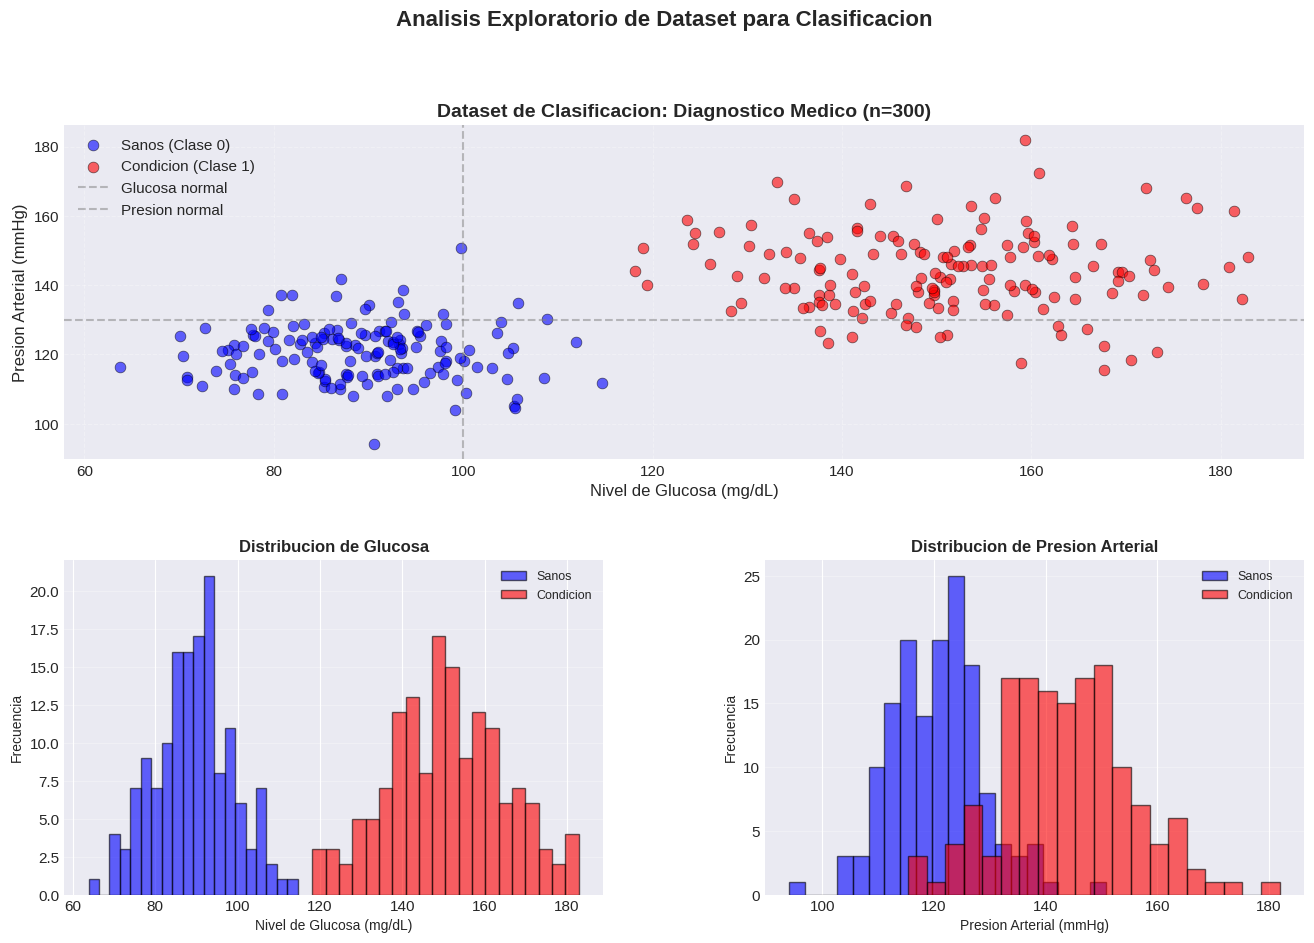

Dataset creado exitosamente

Estadisticas de Clase 0 (Sanos):
  Glucosa - Media: 89.18, Std: 9.39
  Presion - Media: 120.57, Std: 8.15

Estadisticas de Clase 1 (Condicion):
  Glucosa - Media: 150.82, Std: 14.20
  Presion - Media: 143.82, Std: 11.61

Total de muestras: 300
Balance de clases: 50% - 50% (dataset balanceado)


In [ ]:
# Generar dataset sintético de clasificación binaria (ej: diagnóstico médico)
np.random.seed(42)

# Clase 0: Pacientes sanos
n_samples = 150
healthy_glucose = np.random.normal(90, 10, n_samples)  # Glucosa normal
healthy_pressure = np.random.normal(120, 8, n_samples)  # Presión normal

# Clase 1: Pacientes con condición
sick_glucose = np.random.normal(150, 15, n_samples)  # Glucosa elevada
sick_pressure = np.random.normal(145, 12, n_samples)  # Presión elevada

# Crear figura con análisis completo
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# ========== SUBPLOT 1: Scatter Plot Principal ==========
ax1 = fig.add_subplot(gs[0, :])  # Ocupa toda la primera fila

ax1.scatter(healthy_glucose, healthy_pressure, c='blue', alpha=0.6, s=60,
            label='Sanos (Clase 0)', edgecolors='black', linewidth=0.5)
ax1.scatter(sick_glucose, sick_pressure, c='red', alpha=0.6, s=60,
            label='Condicion (Clase 1)', edgecolors='black', linewidth=0.5)

# Líneas de referencia para valores normales
ax1.axvline(x=100, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='Glucosa normal')
ax1.axhline(y=130, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='Presion normal')

ax1.set_title('Dataset de Clasificacion: Diagnostico Medico (n=300)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Nivel de Glucosa (mg/dL)', fontsize=12)
ax1.set_ylabel('Presion Arterial (mmHg)', fontsize=12)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# ========== SUBPLOT 2: Histograma de Glucosa ==========
ax2 = fig.add_subplot(gs[1, 0])

ax2.hist(healthy_glucose, bins=20, color='blue', alpha=0.6,
         edgecolor='black', label='Sanos')
ax2.hist(sick_glucose, bins=20, color='red', alpha=0.6,
         edgecolor='black', label='Condicion')

ax2.set_title('Distribucion de Glucosa', fontsize=12, fontweight='bold')
ax2.set_xlabel('Nivel de Glucosa (mg/dL)', fontsize=10)
ax2.set_ylabel('Frecuencia', fontsize=10)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# ========== SUBPLOT 3: Histograma de Presión ==========
ax3 = fig.add_subplot(gs[1, 1])

ax3.hist(healthy_pressure, bins=20, color='blue', alpha=0.6,
         edgecolor='black', label='Sanos')
ax3.hist(sick_pressure, bins=20, color='red', alpha=0.6,
         edgecolor='black', label='Condicion')

ax3.set_title('Distribucion de Presion Arterial', fontsize=12, fontweight='bold')
ax3.set_xlabel('Presion Arterial (mmHg)', fontsize=10)
ax3.set_ylabel('Frecuencia', fontsize=10)
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')

plt.suptitle('Analisis Exploratorio de Dataset para Clasificacion',
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

# Estadísticas del dataset
print("Dataset creado exitosamente\n")
print("Estadisticas de Clase 0 (Sanos):")
print(f"  Glucosa - Media: {healthy_glucose.mean():.2f}, Std: {healthy_glucose.std():.2f}")
print(f"  Presion - Media: {healthy_pressure.mean():.2f}, Std: {healthy_pressure.std():.2f}")
print("\nEstadisticas de Clase 1 (Condicion):")
print(f"  Glucosa - Media: {sick_glucose.mean():.2f}, Std: {sick_glucose.std():.2f}")
print(f"  Presion - Media: {sick_pressure.mean():.2f}, Std: {sick_pressure.std():.2f}")
print(f"\nTotal de muestras: {2 * n_samples}")
print("Balance de clases: 50% - 50% (dataset balanceado)")

---

### **5.2 Graficar Evolución del Entrenamiento**

Una de las visualizaciones más importantes en IA: monitorear cómo aprende nuestro modelo observando pérdida y precisión en entrenamiento y validación.

---

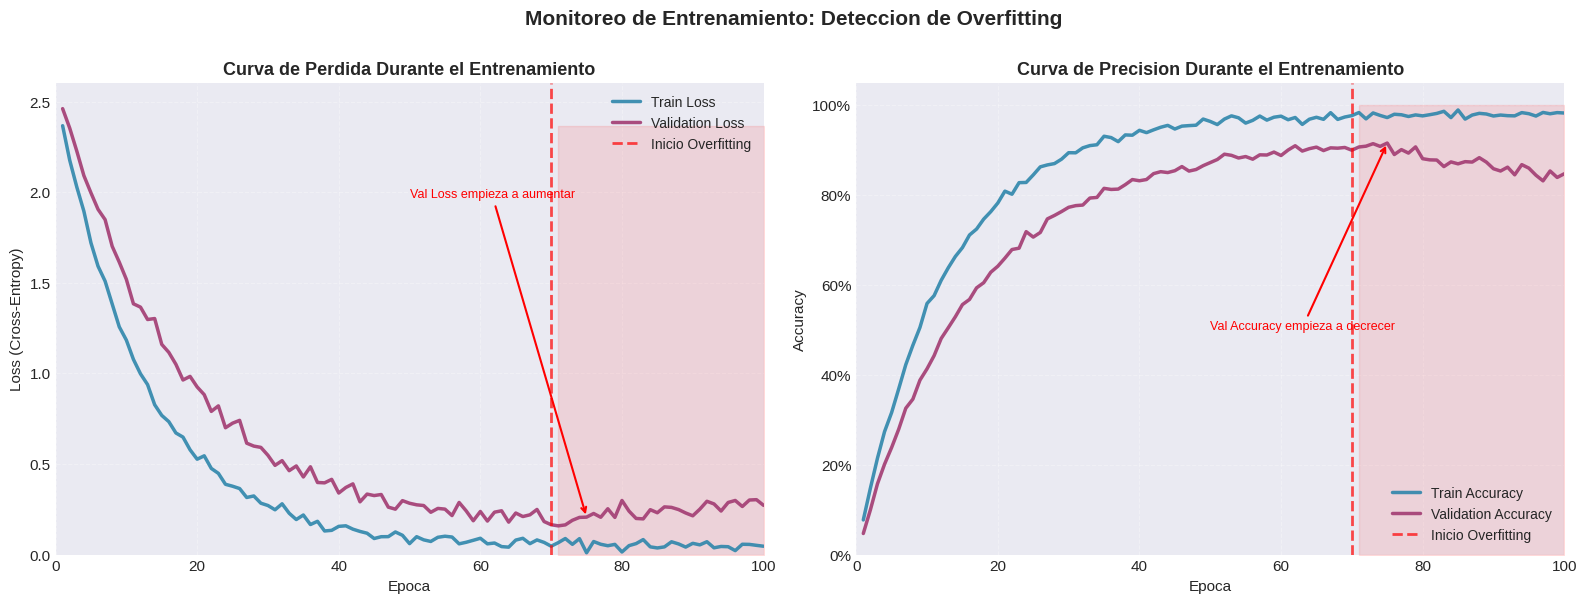

Metricas de entrenamiento visualizadas

Epoca 50:
  Train Loss: 0.0605 | Val Loss: 0.2834
  Train Acc: 96.41% | Val Acc: 87.25%

Epoca 100:
  Train Loss: 0.0461 | Val Loss: 0.2719
  Train Acc: 98.28% | Val Acc: 84.76%

OBSERVACION: Overfitting detectado despues de epoca 70
  - Val Loss aumenta mientras Train Loss disminuye
  - Val Accuracy disminuye mientras Train Accuracy aumenta
  - Recomendacion: detener entrenamiento en epoca ~70 (Early Stopping)


In [ ]:
# Simular el entrenamiento de un modelo durante 100 épocas
np.random.seed(42)
epochs = np.arange(1, 101)

# Pérdida de entrenamiento (decrece más rápido)
train_loss = 2.5 * np.exp(-0.08 * epochs) + 0.05 + np.random.normal(0, 0.02, len(epochs))
train_loss = np.maximum(train_loss, 0.01)

# Pérdida de validación (decrece más lento, puede tener overfitting)
val_loss = 2.5 * np.exp(-0.06 * epochs) + 0.15 + np.random.normal(0, 0.03, len(epochs))
# Simular overfitting después de época 70
val_loss[70:] = val_loss[70:] + np.linspace(0, 0.15, len(val_loss[70:]))

# Accuracy de entrenamiento
train_acc = (1 - np.exp(-0.08 * epochs)) * 0.98 + np.random.normal(0, 0.005, len(epochs))
train_acc = np.clip(train_acc, 0, 1)

# Accuracy de validación
val_acc = (1 - np.exp(-0.06 * epochs)) * 0.92 + np.random.normal(0, 0.008, len(epochs))
# Simular overfitting en accuracy
val_acc[70:] = val_acc[70:] - np.linspace(0, 0.08, len(val_acc[70:]))
val_acc = np.clip(val_acc, 0, 1)

# Crear figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ========== SUBPLOT 1: Pérdida (Loss) ==========
ax1.plot(epochs, train_loss, color='#2E86AB', linewidth=2.5, label='Train Loss', alpha=0.9)
ax1.plot(epochs, val_loss, color='#A23B72', linewidth=2.5, label='Validation Loss', alpha=0.9)

# Marcar el punto de overfitting
ax1.axvline(x=70, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Inicio Overfitting')
ax1.fill_between(epochs[70:], 0, train_loss.max(), color='red', alpha=0.1)

ax1.set_title('Curva de Perdida Durante el Entrenamiento', fontsize=13, fontweight='bold')
ax1.set_xlabel('Epoca', fontsize=11)
ax1.set_ylabel('Loss (Cross-Entropy)', fontsize=11)
ax1.legend(loc='upper right', fontsize=10, framealpha=0.95)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(0, 100)
ax1.set_ylim(0, train_loss.max() * 1.1)

# Anotación
ax1.annotate('Val Loss empieza a aumentar',
             xy=(75, val_loss[74]), xytext=(50, val_loss.max() * 0.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red')

# ========== SUBPLOT 2: Accuracy ==========
ax2.plot(epochs, train_acc, color='#2E86AB', linewidth=2.5, label='Train Accuracy', alpha=0.9)
ax2.plot(epochs, val_acc, color='#A23B72', linewidth=2.5, label='Validation Accuracy', alpha=0.9)

# Marcar el punto de overfitting
ax2.axvline(x=70, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Inicio Overfitting')
ax2.fill_between(epochs[70:], 0, 1, color='red', alpha=0.1)

ax2.set_title('Curva de Precision Durante el Entrenamiento', fontsize=13, fontweight='bold')
ax2.set_xlabel('Epoca', fontsize=11)
ax2.set_ylabel('Accuracy', fontsize=11)
ax2.legend(loc='lower right', fontsize=10, framealpha=0.95)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 1.05)

# Formatear eje Y como porcentaje
ax2.set_yticks(np.arange(0, 1.1, 0.2))
ax2.set_yticklabels([f'{int(x*100)}%' for x in np.arange(0, 1.1, 0.2)])

# Anotación
ax2.annotate('Val Accuracy empieza a decrecer',
             xy=(75, val_acc[74]), xytext=(50, 0.5),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red')

plt.suptitle('Monitoreo de Entrenamiento: Deteccion de Overfitting',
             fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("Metricas de entrenamiento visualizadas\n")
print("Epoca 50:")
print(f"  Train Loss: {train_loss[49]:.4f} | Val Loss: {val_loss[49]:.4f}")
print(f"  Train Acc: {train_acc[49]:.2%} | Val Acc: {val_acc[49]:.2%}")
print("\nEpoca 100:")
print(f"  Train Loss: {train_loss[99]:.4f} | Val Loss: {val_loss[99]:.4f}")
print(f"  Train Acc: {train_acc[99]:.2%} | Val Acc: {val_acc[99]:.2%}")
print("\nOBSERVACION: Overfitting detectado despues de epoca 70")
print("  - Val Loss aumenta mientras Train Loss disminuye")
print("  - Val Accuracy disminuye mientras Train Accuracy aumenta")
print("  - Recomendacion: detener entrenamiento en epoca ~70 (Early Stopping)")

---

### **5.3 Visualizar Fronteras de Decisión**

Las fronteras de decisión nos ayudan a entender cómo un clasificador separa las clases en el espacio de características.

---

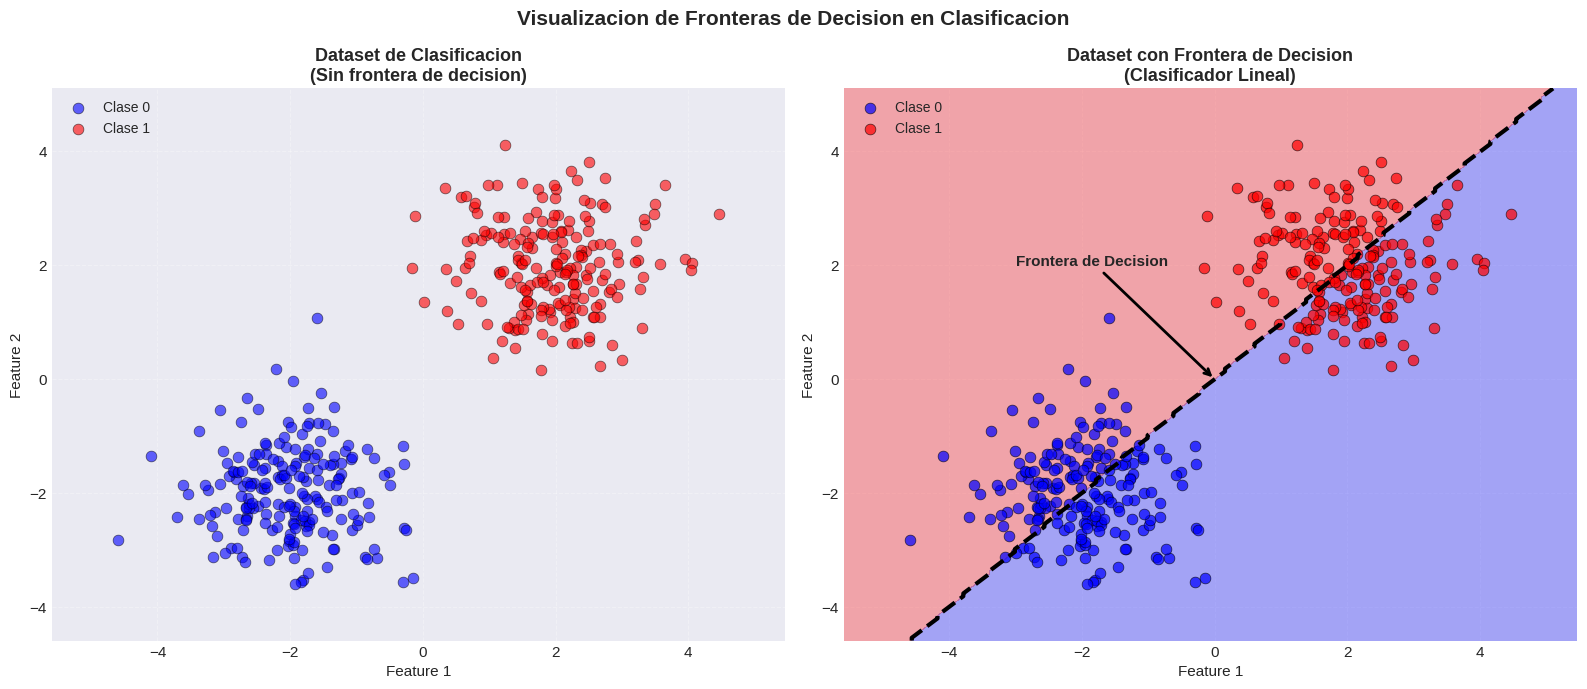

Frontera de decision visualizada

Total de muestras: 400
Clase 0: 200 muestras
Clase 1: 200 muestras

Accuracy del clasificador: 47.25%

Interpretacion:
  - Zona azul: Clasificador predice Clase 0
  - Zona roja: Clasificador predice Clase 1
  - Linea negra: Frontera de decision (umbral)
  - Puntos en zona incorrecta: Clasificaciones erroneas


In [ ]:
# Generar dataset de clasificación binaria
np.random.seed(42)
n_samples = 200

# Clase 0
X0 = np.random.randn(n_samples, 2) * 0.8 + np.array([-2, -2])
y0 = np.zeros(n_samples)

# Clase 1
X1 = np.random.randn(n_samples, 2) * 0.8 + np.array([2, 2])
y1 = np.ones(n_samples)

# Combinar datos
X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

# Simular una frontera de decisión lineal simple
# Ecuación: y = mx + b -> separación diagonal
def decision_boundary(x):
    return x  # Línea y = x

# Crear malla para visualizar la frontera
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Clasificar cada punto de la malla (simplificado: y > x -> Clase 1)
Z = (yy > xx).astype(int)

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ========== SUBPLOT 1: Solo datos ==========
ax1.scatter(X0[:, 0], X0[:, 1], c='blue', alpha=0.6, s=60,
            label='Clase 0', edgecolors='black', linewidth=0.5)
ax1.scatter(X1[:, 0], X1[:, 1], c='red', alpha=0.6, s=60,
            label='Clase 1', edgecolors='black', linewidth=0.5)

ax1.set_title('Dataset de Clasificacion\n(Sin frontera de decision)',
              fontsize=13, fontweight='bold')
ax1.set_xlabel('Feature 1', fontsize=11)
ax1.set_ylabel('Feature 2', fontsize=11)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# ========== SUBPLOT 2: Con frontera de decisión ==========
# Colorear regiones según la clasificación
ax2.contourf(xx, yy, Z, alpha=0.3, levels=1, colors=['blue', 'red'])
# Línea de frontera
ax2.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3, linestyles='--')

# Graficar puntos
ax2.scatter(X0[:, 0], X0[:, 1], c='blue', alpha=0.7, s=60,
            label='Clase 0', edgecolors='black', linewidth=0.5)
ax2.scatter(X1[:, 0], X1[:, 1], c='red', alpha=0.7, s=60,
            label='Clase 1', edgecolors='black', linewidth=0.5)

ax2.set_title('Dataset con Frontera de Decision\n(Clasificador Lineal)',
              fontsize=13, fontweight='bold')
ax2.set_xlabel('Feature 1', fontsize=11)
ax2.set_ylabel('Feature 2', fontsize=11)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)

# Anotación
ax2.annotate('Frontera de Decision',
             xy=(0, 0), xytext=(-3, 2),
             arrowprops=dict(arrowstyle='->', color='black', lw=2),
             fontsize=11, fontweight='bold')

plt.suptitle('Visualizacion de Fronteras de Decision en Clasificacion',
             fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Calcular accuracy simple
predictions = (X[:, 1] > X[:, 0]).astype(int)
accuracy = (predictions == y).mean()

print("Frontera de decision visualizada\n")
print(f"Total de muestras: {len(X)}")
print(f"Clase 0: {len(X0)} muestras")
print(f"Clase 1: {len(X1)} muestras")
print(f"\nAccuracy del clasificador: {accuracy:.2%}")
print("\nInterpretacion:")
print("  - Zona azul: Clasificador predice Clase 0")
print("  - Zona roja: Clasificador predice Clase 1")
print("  - Linea negra: Frontera de decision (umbral)")
print("  - Puntos en zona incorrecta: Clasificaciones erroneas")

---

### **5.4 Visualizar Imágenes con plt.imshow()**

En Deep Learning trabajamos constantemente con imágenes. Matplotlib nos permite visualizarlas de manera efectiva.

---

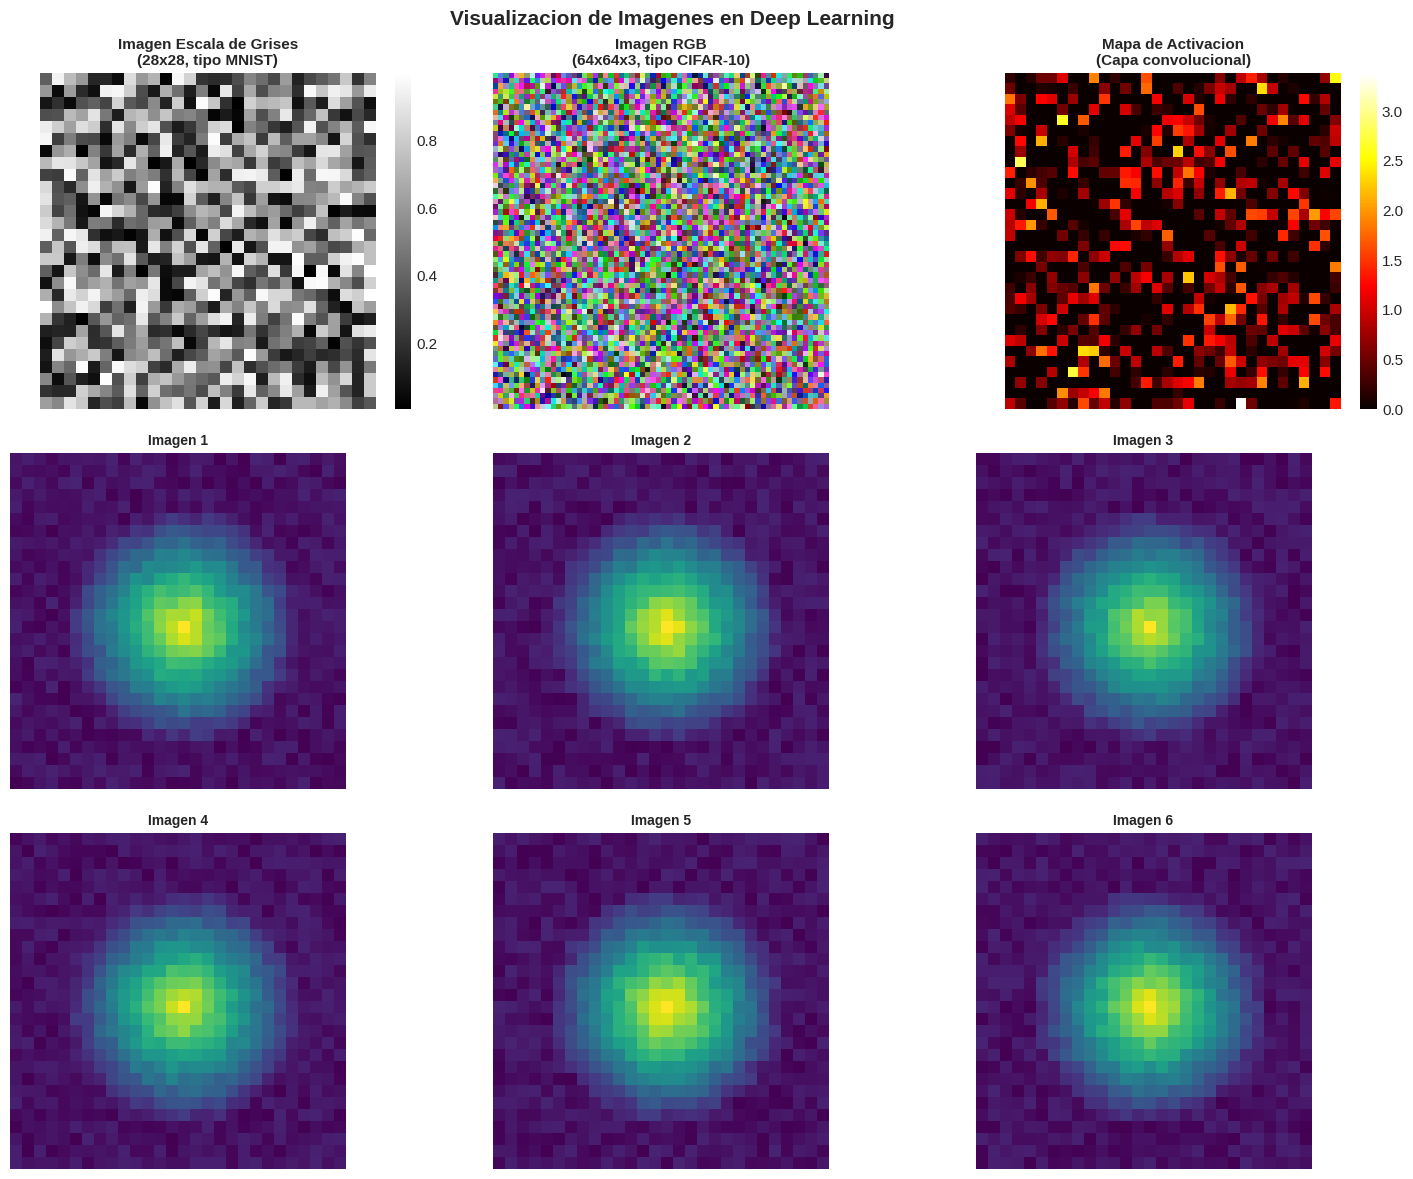

Imagenes visualizadas correctamente

Informacion de las imagenes:
  - Imagen 1 (Grises): shape (28, 28), valores en [0.01, 1.00]
  - Imagen 2 (RGB): shape (64, 64, 3), 3 canales (R, G, B)
  - Imagen 3 (Activacion): shape (32, 32), valores en [0.00, 3.38]
  - Batch: 6 imagenes de (28, 28)

Colormaps utiles:
  - 'gray': escala de grises (MNIST, imagenes medicas)
  - 'viridis': perceptualmente uniforme (por defecto)
  - 'hot': mapas de calor (activaciones)
  - 'coolwarm': divergente (visualizar diferencias)

Nota: axis('off') oculta los ejes para mejor visualizacion


In [ ]:
# Crear imágenes sintéticas (simulando datos reales)
np.random.seed(42)

# Imagen 1: Imagen en escala de grises (28x28, similar a MNIST)
gray_image = np.random.rand(28, 28)

# Imagen 2: Imagen RGB (64x64x3, similar a CIFAR-10)
rgb_image = np.random.rand(64, 64, 3)

# Imagen 3: Simular un mapa de activación de red neuronal
activation_map = np.random.randn(32, 32)
activation_map = np.maximum(activation_map, 0)  # ReLU

# Imagen 4: Batch de imágenes (simular 6 dígitos MNIST)
batch_size = 6
mnist_batch = []
for i in range(batch_size):
    # Crear dígito sintético simple
    img = np.zeros((28, 28))
    center_x, center_y = 14, 14
    for x in range(28):
        for y in range(28):
            dist = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            img[x, y] = max(0, 1 - dist / 10) + np.random.rand() * 0.1
    mnist_batch.append(img)

# Crear figura con múltiples visualizaciones
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# ========== SUBPLOT 1: Imagen en escala de grises ==========
ax1 = axes[0, 0]
im1 = ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Imagen Escala de Grises\n(28x28, tipo MNIST)', fontsize=11, fontweight='bold')
ax1.axis('off')
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# ========== SUBPLOT 2: Imagen RGB ==========
ax2 = axes[0, 1]
im2 = ax2.imshow(rgb_image)
ax2.set_title('Imagen RGB\n(64x64x3, tipo CIFAR-10)', fontsize=11, fontweight='bold')
ax2.axis('off')

# ========== SUBPLOT 3: Mapa de activación ==========
ax3 = axes[0, 2]
im3 = ax3.imshow(activation_map, cmap='hot', interpolation='nearest')
ax3.set_title('Mapa de Activacion\n(Capa convolucional)', fontsize=11, fontweight='bold')
ax3.axis('off')
plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)

# ========== SUBPLOTS 4-9: Batch de imágenes ==========
for idx in range(batch_size):
    row = 1 + idx // 3  # Filas 1 y 2
    col = idx % 3        # Columnas 0, 1, 2

    ax = axes[row, col]
    ax.imshow(mnist_batch[idx], cmap='viridis')
    ax.set_title(f'Imagen {idx+1}', fontsize=10, fontweight='bold')
    ax.axis('off')

plt.suptitle('Visualizacion de Imagenes en Deep Learning',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("Imagenes visualizadas correctamente\n")
print("Informacion de las imagenes:")
print(f"  - Imagen 1 (Grises): shape {gray_image.shape}, valores en [{gray_image.min():.2f}, {gray_image.max():.2f}]")
print(f"  - Imagen 2 (RGB): shape {rgb_image.shape}, 3 canales (R, G, B)")
print(f"  - Imagen 3 (Activacion): shape {activation_map.shape}, valores en [{activation_map.min():.2f}, {activation_map.max():.2f}]")
print(f"  - Batch: {batch_size} imagenes de {mnist_batch[0].shape}")
print("\nColormaps utiles:")
print("  - 'gray': escala de grises (MNIST, imagenes medicas)")
print("  - 'viridis': perceptualmente uniforme (por defecto)")
print("  - 'hot': mapas de calor (activaciones)")
print("  - 'coolwarm': divergente (visualizar diferencias)")
print("\nNota: axis('off') oculta los ejes para mejor visualizacion")